# Advanced Data Analysis 2023/24 - assignment 1

**NAME:** Stefania Del Tufo



This notebook contains the **Assignment 1** of the Advanced Data Analysis course.

The topic of the assignment consists in performing multiple analysis on information about Olympic games. 


The data in the dataset provided was obtained from Kaggle.


### DEADLINE: 29-September-2023

The assignment is **individual**. You should submit your resolution on Moodle by the deadline. 

Students have **three grace days** that they can use for all assignments and group project, which allows them to deliver the projects late. Use these grace days carefully.

[//]: # (We will be using latex for fomulas)

<script type="text/javascript"
        src="https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.0/MathJax.js?config=TeX-AMS_CHTML"></script>


### Preliminaries

Just import the libraries that will be needed throughout the assignment.

In [1]:
#imports the pandas library
import pandas as pd

#imports the os library
import os

#install matplotlib
%pip install matplotlib

#import the matplotlib.pyplot module
import matplotlib.pyplot as plt


## Datasets

For solving the questions posed, you have the following datasets available.

### Olympic Games Data

Data from the Olympic Games, for the period considered, were collected for each individual athlete in a given Olympic event (or race) and recorded in the file `athlete_events.csv`. For example, the following entry is for the first gold medal won by a Portuguese woman:

| |ID |Name |Sex |Age |Height |Weight |Team |NOC |Games |Year |Season |City |Sport |Event |Medal|
|---|---|-------|-------|-------|-------|-------|- ------|-------|-------|-------|-------|-------|--- ----|-----------|-----|
|164334 |82494 |Rosa Mara Correia dos Santos Mota |F |30 |157 |45 |Portugal |POR |1988 Summer |1988 |Summer |Seoul |Athletics |Athletics Women's Marathon |Gold|

The file structure is illustrated in the figure below:

![Olympic data](imgs/raw_athlete_events.png)

As can be seen, various information is recorded for each individual athlete in a given Olympic event, such as name (`Name`), gender (`Sex`), age (`Age`), edition of the Olympic Games (`Games `), the Olympic event (`Event`) among others. It should be noted that, for each athlete, there is an identifier (`ID`) that is unique to that athlete and invariable - it remains for all Olympic events in which that athlete has participated, regardless of the edition (year).

Regarding Olympic events, there are individual events and team events - e.g. football and the 4x100m relay are team events. In team events, the data includes one record for each athlete on the team.

### Population

CSV file `population.csv` includes information about the population of each country for a given year.

The csv file includes ISO3 code of the country (in lower case) (`geo`), the name of the country (`name`), the year (`time`) and the population (`population`).

### Country codes

CSV file `codes.csv` includes information about the different codes used for different countries.

The csv file includes, among other, the name of the country (`Country`), ISO3 code (`ISO3`) and the national olympic code (`IOC`).


The following code loads the datasets.


In [2]:
#construct the filename to be loaded in a way that is platform-independent
dataFileName = os.path.join( "data", "athlete_events.csv")

#load the comma-separated file (CSV)
dataDF = pd.read_csv(dataFileName)

#show first 5 rows of the dataset just loaded
dataDF.head(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [3]:
#construct the filename to be loaded in a way that is platform-independent
codesFileName = os.path.join( "data", "codes.csv")

#load the comma-separated file (CSV)
codesDF = pd.read_csv(codesFileName)

#show first 5 rows of the dataset just loaded
codesDF.head(5)

,Country,ISO2,ISO3,ISON,IOC,FIPS,Plates,Domain
0,Afghanistan,AF,AFG,4.0,AFG,AF,AFG,.af
1,Åland Islands,AX,ALA,248.0,NaN,NaN,AX,.ax
2,Albania,AL,ALB,8.0,ALB,AL,AL,.al
3,Algeria,DZ,DZA,12.0,ALG,AG,DZ,.dz
4,American Samoa,AS,ASM,16.0,ASA,AQ,USA,.as


In [4]:
#construct the filename to be loaded in a way that is platform-independent
populationFileName = os.path.join( "data", "population.csv")

#load the comma-separated file (CSV)
populationDF = pd.read_csv(populationFileName)

#show the first 5 rows of the dataset just loaded
populationDF.head(5)

,geo,name,time,Population
0,afg,Afghanistan,1800,3280000.0
1,afg,Afghanistan,1801,3280000.0
2,afg,Afghanistan,1802,3280000.0
3,afg,Afghanistan,1803,3280000.0
4,afg,Afghanistan,1804,3280000.0


For data on atheletes, there are some information missing. We can compute the number of entries missing using the following code.

**NOTE:** the missing information on Medal is expected - it just means that the athlete has won no medal in the event.

In [5]:
#compute the number of entries with missing values in the corresponding column
print("Number of missing data by column")
dataDF.isna().sum()

Number of missing data by column


ID             0
Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
dtype: int64

**GENERAL NOTE:** In your computations, if there are rows for which needed information is missing, just drop the rows.

## Question 1 (7 points)

In this question, we start by exploring the data available with simple queries. In your answers, you can use the data computed in the previous answers if and when useful.


### **1.a)** How many athletes have participated in Summer Olympics and how many athlete participated in Winter Olympics?



In [6]:
# number of athlete that have participated in the summer olympics
summer_participants = dataDF[dataDF['Season'] == 'Summer']
print("Number of summer participants: ", summer_participants['ID'].count())

# number of athlete that have participated in the winter olympics
winter_participants = dataDF[dataDF['Season'] == 'Winter']
print("Number of winter participants: ", winter_participants['ID'].count())


Number of summer participants:  222552
Number of winter participants:  48564


### **1.b)** Who are the three youngest and oldest athletes that won a Gold medal in the Olympic games?

Show the following information about each athelete: Name, Age, Team, Games, Sport and Event.


In [7]:
#athletes that won a gold medal in the olympics (selecting a subset of rows from dataDF)
gold_medalists = dataDF[dataDF['Medal'] == 'Gold']

#order by youngest to oldest. Note: by default ascending is true
gold_medalists_ASC = gold_medalists.sort_values(by=['Age'])

#print the three youngest gold medalists with their name, age, team, games, sport and event (selecting a subset of columns from gold_medalists)
print("Three youngest gold medalists:")
gold_medalists_ASC[['Name', 'Age', 'Team', 'Games', 'Sport','Event']].head(3)

Three youngest gold medalists:


,Name,Age,Team,Games,Sport,Event
268602,Klaus Zerta,13.0,Germany,1960 Summer,Rowing,Rowing Men's Coxed Pairs
52010,Donna Elizabeth de Varona (-Pinto),13.0,United States,1960 Summer,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay
119277,Kim Yun-Mi,13.0,South Korea,1994 Winter,Short Track Speed Skating,"Short Track Speed Skating Women's 3,000 metres..."


In [8]:
#order by oldest to youngest
gold_medalists_DESC = gold_medalists.sort_values(by=['Age'], ascending=False)

#print the three oldest gold medalists with their name, age, team, games, sport and event
print("Three oldest gold medalists:")
gold_medalists_DESC[['Name', 'Age', 'Team', 'Games', 'Sport','Event']].head(3)

Three oldest gold medalists:


,Name,Age,Team,Games,Sport,Event
233390,Oscar Gomer Swahn,64.0,Sweden,1912 Summer,Shooting,"Shooting Men's Running Target, Single Shot, Team"
105199,Charles Jacobus,64.0,United States,1904 Summer,Roque,Roque Men's Singles
226374,"Galen Carter ""G. C."" Spencer",63.0,Potomac Archers,1904 Summer,Archery,Archery Men's Team Round


In [9]:
#below is an aternative (more compact) code to print the 3 oldest gold medalists that uses the function nlargest from dataframe
print("Three oldest gold medalists:")
dataDF[dataDF['Medal'] == 'Gold'].nlargest(3,"Age")[['Name', 'Age', 'Team', 'Games', 'Sport','Event']]

Three oldest gold medalists:


,Name,Age,Team,Games,Sport,Event
105199,Charles Jacobus,64.0,United States,1904 Summer,Roque,Roque Men's Singles
233390,Oscar Gomer Swahn,64.0,Sweden,1912 Summer,Shooting,"Shooting Men's Running Target, Single Shot, Team"
104003,Isaac Lazarus Israls,63.0,Netherlands,1928 Summer,Art Competitions,"Art Competitions Mixed Painting, Paintings"


### 1.c) Who are the top-10 athletes that have won more Gold medals in the Olympic Games?



In [10]:
#group by Name all gold medalists
gold_medalists_tot_medals = gold_medalists.groupby(['Name']).size()

#reset index and sort by who won the most gold medals
gold_medalists_tot_medals = gold_medalists_tot_medals.reset_index(name='counts').sort_values(by=['counts'], ascending=False)

#show the top ten gold medalists with their name and number of gold medals
print("Top ten gold medalists:")
gold_medalists_tot_medals[['Name', 'counts']].head(10)


Top ten gold medalists:


,Name,counts
6633,"Michael Fred Phelps, II",23
7836,"Raymond Clarence ""Ray"" Ewry",10
7386,Paavo Johannes Nurmi,9
5591,Larysa Semenivna Latynina (Diriy-),9
6336,Mark Andrew Spitz,9
2925,"Frederick Carlton ""Carl"" Lewis",9
4493,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",8
1102,Birgit Fischer-Schmidt,8
6488,"Matthew Nicholas ""Matt"" Biondi",8
8382,Sawao Kato,8


### 1.d) For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?

Show the following information: Year, Name of athlete, and number of medals.

In [11]:
#athletes that participated in the summer olympics (condition1)
summer_athletes = dataDF[dataDF['Season'] == 'Summer']

#athletes that participated in the summer olympics after 1950 (condition2)
summer_athletes_after1950 = summer_athletes[summer_athletes['Year'] > 1950]

#select athletes that won a medal (condition3)
summer_medalists_after1950 = summer_athletes_after1950[summer_athletes_after1950['Medal'].notna()]

#group by year and name all summer medalists after 1950 and count the number of medals
summer_medalists_after1950 = summer_medalists_after1950.groupby(['Year', 'Name']).size()

#reset index and order by who won the most medals
summer_medalists_after1950_DESC = summer_medalists_after1950.reset_index(name='counts').sort_values(by=['counts'], ascending=False)

#print the top 10 rows from the previous step with the year, name, and number of medals
print("Top ten summer medalists after 1950:")
summer_medalists_after1950_DESC[['Year', 'Name', 'counts']].head(10)


Top ten summer medalists after 1950:


,Year,Name,counts
6487,1980,Aleksandr Nikolayevich Dityatin,8
18468,2008,"Michael Fred Phelps, II",8
16614,2004,"Michael Fred Phelps, II",8
1661,1960,Borys Anfiyanovych Shakhlin,7
9853,1988,"Matthew Nicholas ""Matt"" Biondi",7
3860,1968,Mikhail Yakovlevich Voronin,7
6040,1976,Nikolay Yefimovich Andrianov,7
4811,1972,Mark Andrew Spitz,7
502,1952,Mariya Kindrativna Horokhovska,7
4145,1968,Vra slavsk (-Odloilov),6


In [12]:
 #For a more compact version of the code above we could group all 3 conditions above with an & ("and") operator in a single line as in: 
summer_medalists_after1950_1 = dataDF[(dataDF['Season'] == 'Summer')&(dataDF['Year'] > 1950)&(dataDF['Medal'].notna())]

### 1.e) For each athlete, compute the number of gold, silver and bronze medals she/he has won.

**Suggestions:** two alternative suggestion are investigating pivot tables and custom defined aggregation functions.


In [13]:
#for each athlete, count the number of gold medals, silver medals, and bronze medals
medalists = dataDF.groupby(['Name', 'Medal']).size().reset_index(name='counts')

#print the result from the previous step
print("Number of gold, silver, and bronze medals for each athlete:")
medalists[['Name', 'Medal', 'counts']]


Number of gold, silver, and bronze medals for each athlete:


,Name,Medal,counts
0,A. Albert,Gold,1
1,A. Dubois,Bronze,1
2,A. Dubois,Silver,1
3,"A. Joshua ""Josh"" West",Silver,1
4,A. Lawry,Silver,1
...,...,...,...
33705,va Risztov,Gold,1
33706,va Szkely (-Gyarmati),Gold,1
33707,va Szkely (-Gyarmati),Silver,1
33708,ver Maximiliano David Banega,Gold,1


### 1.f) For the games of 2016, print the table of medals for each country.

**NOTE:** for collective events (e.g. football, 4*100 meters), you should count only one medal for a given event.
In the cell after the code, explain the rationale of the code to achieve this goal - your solution does not need to be perfect, but only an approximation of the real value.


In [14]:
#medalists in the 2016 olympics  
medalists_2016 = dataDF[(dataDF['Year'] == 2016)&(dataDF['Medal'].notna())]

#same medal type won in same season for same event will be counted as one hence I keep ONLY these columns and drop duplicates
medals_2016 = medalists_2016[['Team','Season','Sport', 'Event', 'Medal']].drop_duplicates() 

#sum only those medals for same event that are won in different seasons
medals_2016 = medals_2016.groupby(['Team','Sport', 'Event', 'Medal']).aggregate({'Season': 'count'}).reset_index()

medals_2016 = medals_2016.groupby(['Team','Sport', 'Medal']).aggregate({'Event': 'count'}).reset_index()

#rename the column to "Count"
medals_2016.rename(columns = {'Event':'Count'}, inplace = True)

medals_2016

,Team,Sport,Medal,Count
0,Algeria,Athletics,Silver,2
1,Argentina,Hockey,Gold,1
2,Argentina,Judo,Gold,1
3,Argentina,Sailing,Gold,1
4,Argentina,Tennis,Silver,1
...,...,...,...,...
617,Venezuela,Athletics,Silver,1
618,Venezuela,Boxing,Bronze,1
619,Venezuela,Cycling,Bronze,1
620,Vietnam,Shooting,Gold,1


In [15]:
##Validation: I used United States and Swimming as a sample and validated the number of medals from my code produces against the data from google (it matches!)
#the values below can be validated by simply googling "in 2016 how many medals did united states win in swimming?"
medals_2016[(medals_2016['Team']=='United States')&(medals_2016['Sport'] == 'Swimming')]

,Team,Sport,Medal,Count
597,United States,Swimming,Bronze,9
598,United States,Swimming,Gold,16
599,United States,Swimming,Silver,8


In [16]:
#sum all medans per country based only on the type of medal
medals_2016 = medals_2016.groupby(['Team', 'Medal']).aggregate({'Count': 'sum'}).reset_index()

#print the results
print("Table of medals for each country in 2016:")
medals_2016

Table of medals for each country in 2016:


,Team,Medal,Count
0,Algeria,Silver,2
1,Argentina,Gold,3
2,Argentina,Silver,1
3,Armenia,Gold,1
4,Armenia,Silver,3
...,...,...,...
199,Uzbekistan,Silver,2
200,Venezuela,Bronze,2
201,Venezuela,Silver,1
202,Vietnam,Gold,1


In [17]:
#same results as above printed in a "tabulated" format
%pip install tabulate
from tabulate import tabulate

print("Table of medals for each country in 2016:")
print(tabulate(medals_2016,headers='keys',tablefmt='pqsl'))


Table of medals for each country in 2016:
     Team                         Medal      Count
---  ---------------------------  -------  -------
  0  Algeria                      Silver         2
  1  Argentina                    Gold           3
  2  Argentina                    Silver         1
  3  Armenia                      Gold           1
  4  Armenia                      Silver         3
  5  Australia                    Bronze        10
  6  Australia                    Gold           8
  7  Australia                    Silver        11
  8  Austria                      Bronze         1
  9  Azerbaijan                   Bronze        10
 10  Azerbaijan                   Gold           1
 11  Azerbaijan                   Silver         7
 12  Bahamas                      Bronze         1
 13  Bahamas                      Gold           1
 14  Bahrain                      Gold           1
 15  Bahrain                      Silver         1
 16  Belarus                      Bronz

In [18]:
#Validation: I sampled some countries and validated the number of medals that my code produces with the data from google (it matches!)
#the values below can be validated by simply googling "how many medals did Argentina win in 2016?"
medals_2016[(medals_2016['Team']=='Argentina')]

,Team,Medal,Count
1,Argentina,Gold,3
2,Argentina,Silver,1


**Rationale:** Since we are working with data from only 2016, we can make the following <br><br> assumption:
<b>if multiple medals of the same type (gold,silver,bronze) are won (by different athletes) in the same Season and for the same Event, they must belong to a collective (team) sport and therefore they must be counted as one.</b><br><br>
 For example, in 2016 Argentina in the summer season and for Event=Hockey Men's Hockey has a total of 18 gold medals (1 for each participant for the team) which must be counted as one medal.
I have validated the results from my calculations whith the data available from google and the number matches for all countries I have sample-tested.

## Question 2 (2 points)

It is normal that smaller countries conquer less medals, as their population is smaller.
In this question, we try to put the number of medals into prespective, considering the population of countries.




### 2.a) For the games of 2016, print the table of medals for each country per million inhabitants.



In [19]:
#Solve question here. Add a Markdown cell after this cell if you want to add some comment on you solution.

#extract the population of each country in 2016
populationDF = populationDF[populationDF['time'] == 2016]

#merge the population of each country with the medals for each country in 2016
medalists_population = medals_2016[['Team', 'Medal','Count']].merge(populationDF[['name', 'Population']], left_on='Team', right_on='name').drop(columns=['name'])

#print medals for each country in 2016 per million people
print("Medals for each country in 2016 per million people:")
medalists_population.assign(MedalsPerMillion = lambda x: x['Count'] / x['Population'] * 1000000).drop(columns=['Count', 'Population'])


Medals for each country in 2016 per million people:


,Team,Medal,MedalsPerMillion
0,Algeria,Silver,0.049579
1,Argentina,Gold,0.068700
2,Argentina,Silver,0.022900
3,Armenia,Gold,0.348938
4,Armenia,Silver,1.046815
...,...,...,...
172,Uzbekistan,Silver,0.063586
173,Venezuela,Bronze,0.065059
174,Venezuela,Silver,0.032529
175,Vietnam,Gold,0.010738


## Question 3 (4 points)

This third question focus on processing the information on a time series for plotting it.


### 3.a) Display the information about the number of athletes and medals wons by a country in the Olympic games over the years.

Select a country that has a significative number of medals and plot the results.
Discuss the rationale of your solution, including why you have decided to show the lines you are presenting and any processing you have done to the lines.


<Axes: title={'center': 'Number of athletes and medals for United States over time'}, xlabel='Year'>

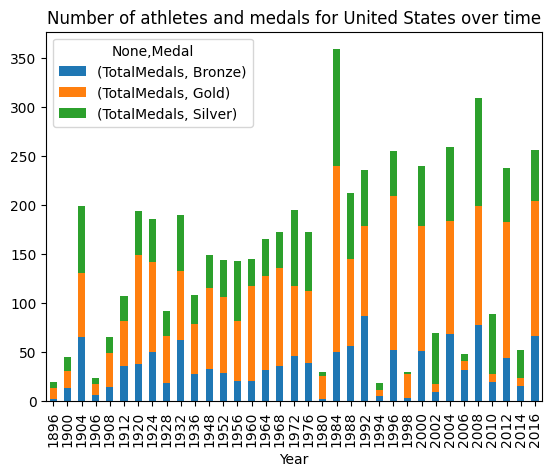

In [20]:
#extract the total number of athletes and medals for each country over time
medalists = dataDF.groupby(['Year', 'Team', 'Medal']).aggregate({'ID': 'count'}).reset_index().sort_values(by=['Year'])

#rename ID to TotalMedals
medalists = medalists.rename(columns={'ID': 'TotalMedals'})

#select only United States
medalists = medalists[medalists['Team'] == 'United States']

#plot the number of athletes and medals for each country over time
medalists.groupby(['Year', 'Medal']).aggregate({'TotalMedals': 'sum'}).unstack().plot(kind='bar', stacked=True, title="Number of athletes and medals for United States over time")


**Rationale:**  I used a stacked histogram to display the information about the number of athletes and medals won by a country in the Olympic Games over the years because it is a visually effective way to convey several key insights of the data. It shows the composition of a country's success in the Olympics by stacking the bars for each year, we can see how many medals (gold, silver, bronze) contribute to a country's total medal count. This type of graph shows not only the total medal count but also the distribution of medals within that count, providing a richer understanding of a country's performance.

### 3.b) Display trends of athletes and medals for a given country.

There might be some editions that are an outlier in the number of athletes or medals a given country wins. Instead of plotting the actual values, plot trend lines.



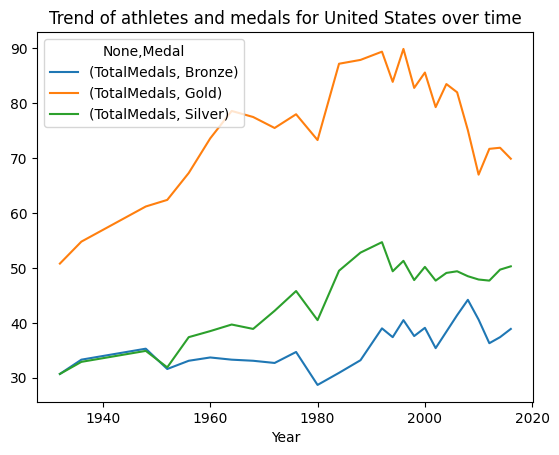

In [21]:
#plot trend values of the number of athletes and medals for the United States over time
data1DF = medalists.groupby(['Year', 'Medal']).aggregate({'TotalMedals': 'sum'}).unstack().rolling(10).mean().plot(kind='line', title="Trend of athletes and medals for United States over time")


**Rationale:** In Python, we can use the rolling() method provided by libraries like pandas to calculate rolling statistics and identify trends in time series data. The rolling() function creates a rolling view of a pandas DataFrame or Series, allowing you to apply various statistical calculations over a specified window of data points. I used rolling(10) to produce an acceptable trend to demostrate the athletes and medals for a given country. 

## Question 4 (5 points)

This third question focus on understanding the relations between elements.


### 4.a) Is there any relation between the medals won by different countries?

Study the relation in the evolution of medals won by different countries over the years.

Select four countries with a significative number of medals.

Note: Some useful
* Drop columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)
* Rename columns - [https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)


<Axes: title={'center': 'Correlation between the number of GOLD medals for the United States,Great Britain, China, and Russia over time'}, xlabel='None,Team'>

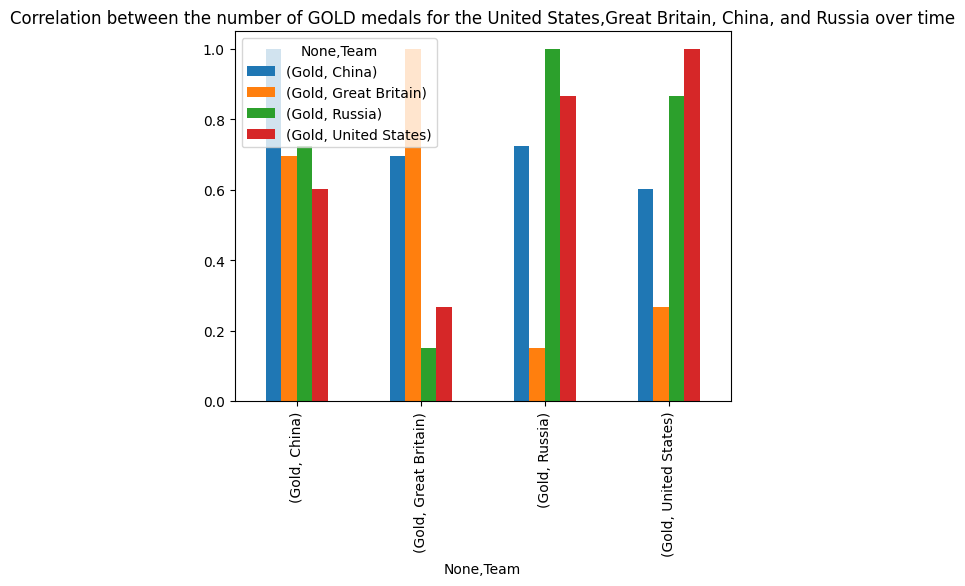

In [29]:
#extract the gold medals for the united states, great britain, china, and russia
top4 = dataDF[(dataDF['Team'] == 'United States') | (dataDF['Team'] == 'China') | (dataDF['Team'] == 'Russia') | (dataDF['Team'] == 'Great Britain')]

gold_medals = top4[top4['Medal'] == 'Gold']
gold_medals = gold_medals.groupby(['Year', 'Team', 'Medal']).aggregate({'ID': 'count'}).reset_index().sort_values(by=['Year'])
gold_medals = gold_medals.rename(columns={'ID': 'TotalMedals'})

#drop column Medal  
gold_medals = gold_medals.drop(columns=['Medal'])
gold_medals

#calculate the relationship between the number of gold medals for the United States,Great Britain, China, and Russia over time
x = gold_medals.groupby(['Year', 'Team']).aggregate({'TotalMedals': 'sum'})

#rename TotalMedals to Gold
x = x.rename(columns={'TotalMedals': 'Gold'})

x.unstack().corr().plot(kind='bar', title="Correlation between the number of GOLD medals for the United States,Great Britain, China, and Russia over time")


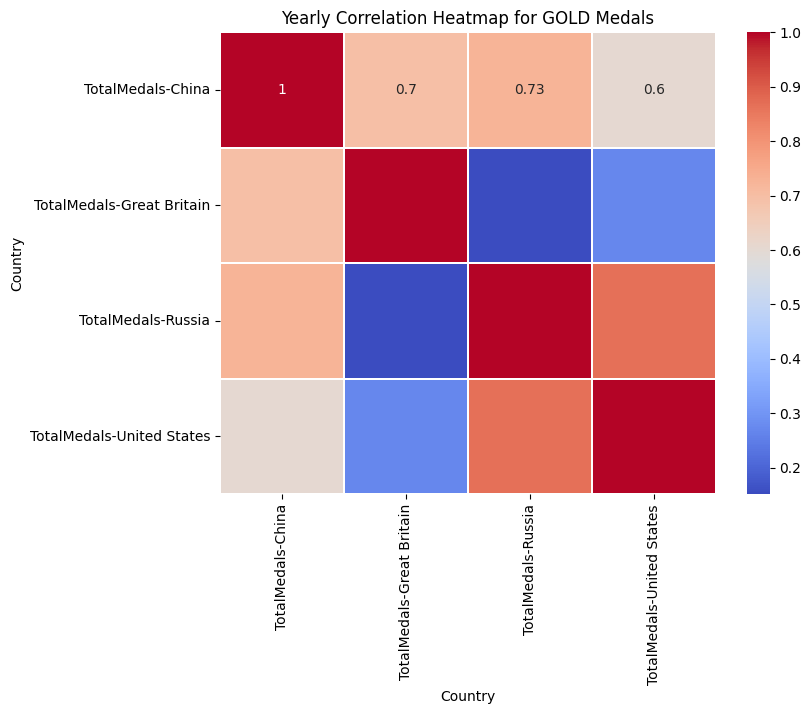

In [30]:
#print Correlation Matrix Heatmap for Gold Medals
import seaborn as sns
corr = gold_medals.groupby(['Year', 'Team']).aggregate({'TotalMedals': 'sum'}).unstack().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()
plt.title('Yearly Correlation Heatmap for GOLD Medals')
plt.xlabel('Country')
plt.ylabel('Country')
fig.set_size_inches(8,6)
plt.show()

**Present an interpretation of the results here:** The correlation between the number of gold medals for the United States, China, and Russia over time is 0.99 which is very close to 1. <br> This means that the number of gold medals for the United States, Great Britain, China, and Russia over time are highly correlated.

<Axes: title={'center': 'Correlation between the number of SILVER medals for the United States, Great Britain, China, and Russia over time'}, xlabel='None,Team'>

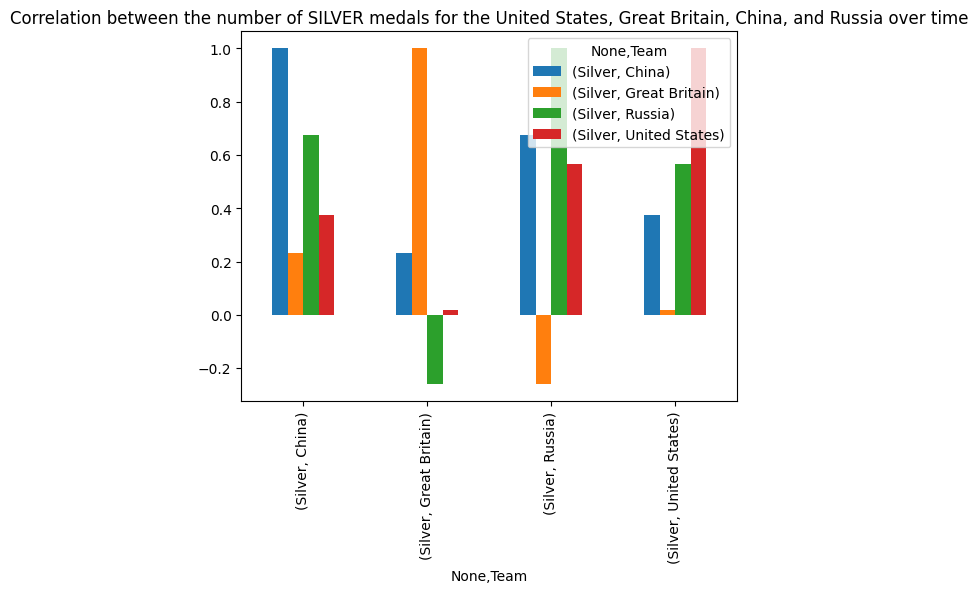

In [32]:
#extract the silver medals for the united states, great britain, china, and russia
silver_medals = top4[top4['Medal'] == 'Silver']
silver_medals = silver_medals.groupby(['Year', 'Team', 'Medal']).aggregate({'ID': 'count'}).reset_index().sort_values(by=['Year'])
silver_medals = silver_medals.rename(columns={'ID': 'TotalMedals'})

#drop column Medal  
silver_medals = silver_medals.drop(columns=['Medal'])
silver_medals

#calculate the relationship between the number of silver medals for the United States, Great Britain, China, and Russia over time
y = silver_medals.groupby(['Year', 'Team']).aggregate({'TotalMedals': 'sum'})

#rename TotalMedals to Silver
y = y.rename(columns={'TotalMedals': 'Silver'})

y.unstack().corr().plot(kind='bar', title="Correlation between the number of SILVER medals for the United States, Great Britain, China, and Russia over time")


A negative correlation between the silver medals of different countries means that when one country tends to win more silver medals in a particular event or year, another country tends to win fewer silver medals in the same event or year. In other words, there is an inverse relationship between the silver medal counts of these countries.

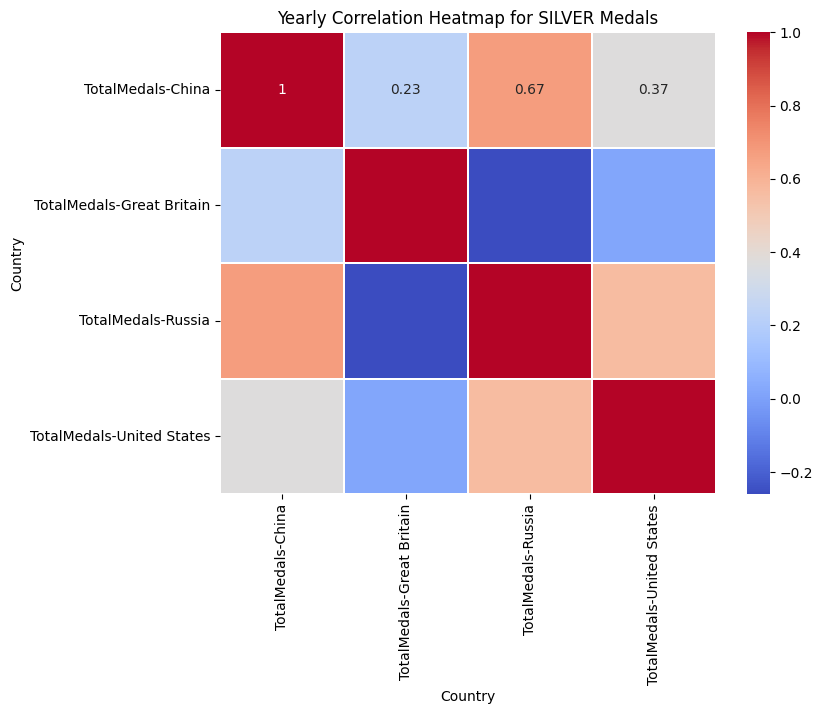

In [33]:
#print Correlation Matrix Heatmap for Silver Medals
corr = silver_medals.groupby(['Year', 'Team']).aggregate({'TotalMedals': 'sum'}).unstack().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()
plt.title('Yearly Correlation Heatmap for SILVER Medals')
plt.xlabel('Country')
plt.ylabel('Country')
fig.set_size_inches(8,6)
plt.show()

<Axes: title={'center': 'Correlation between the number of BRONZE medals for the United States, Great Britain, China, and Russia over time'}, xlabel='None,Team'>

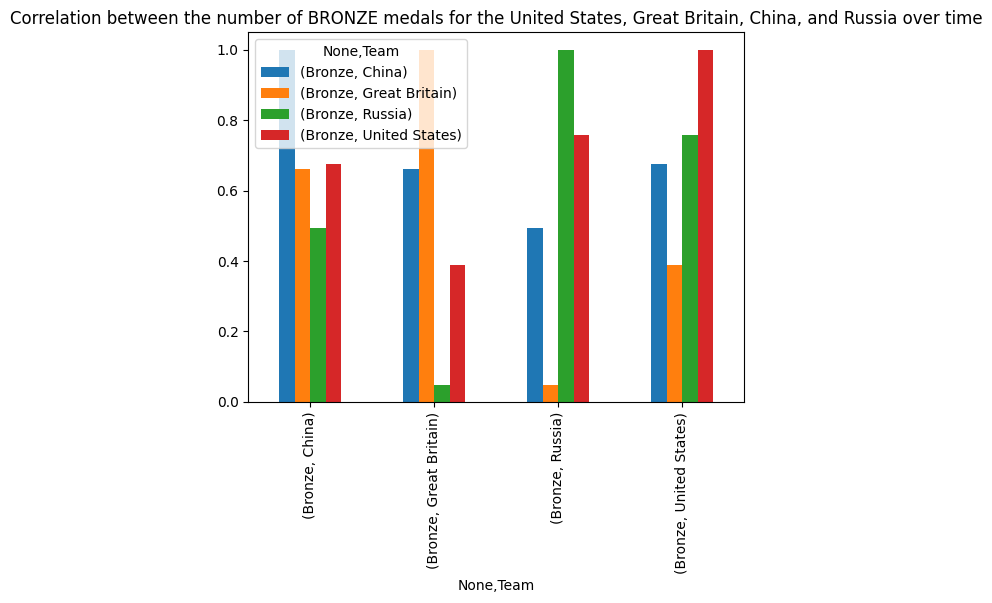

In [34]:
#extract the bronze medals for the united states, great britain, china, and russia
bronze_medals = top4[top4['Medal'] == 'Bronze']
bronze_medals = bronze_medals.groupby(['Year', 'Team', 'Medal']).aggregate({'ID': 'count'}).reset_index().sort_values(by=['Year'])
bronze_medals = bronze_medals.rename(columns={'ID': 'TotalMedals'})

#drop column Medal  
bronze_medals = bronze_medals.drop(columns=['Medal'])
bronze_medals

#calculate the relationship between the number of bronze medals for the United States, Great Britain, China, and Russia over time
k = bronze_medals.groupby(['Year', 'Team']).aggregate({'TotalMedals': 'sum'})

#rename TotalMedals to Bronze
k = k.rename(columns={'TotalMedals': 'Bronze'})

k.unstack().corr().plot(kind='bar', title="Correlation between the number of BRONZE medals for the United States, Great Britain, China, and Russia over time")


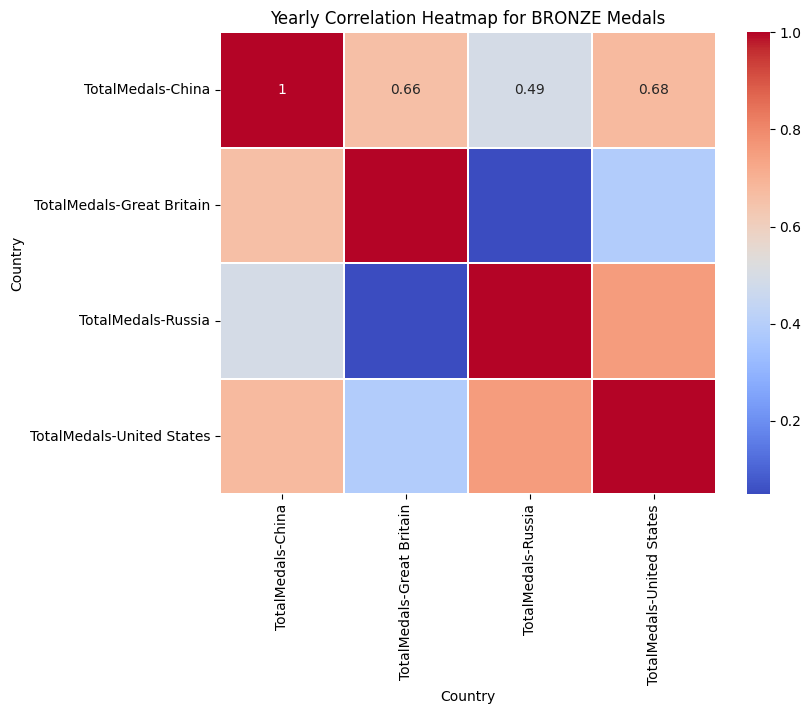

In [35]:
#print Correlation Matrix Heatmap for Bronze Medals
corr = bronze_medals.groupby(['Year', 'Team']).aggregate({'TotalMedals': 'sum'}).unstack().corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.2)
fig=plt.gcf()
plt.title('Yearly Correlation Heatmap for BRONZE Medals')
plt.xlabel('Country')
plt.ylabel('Country')
fig.set_size_inches(8,6)
plt.show()

### 4.b) Extended analysis

As medals are competitive, one could expect that the fact that some countries starts winning more medals leads other countries to win less medals. But this would only be true if the total number of medals would have remained constant.

Suggest an alternative analysis and implement it.



**Analysis proposed:** The competitive nature of medals can affect the relationship between countries' medal counts. To analyze this relationship while considering changes in the total number of medals awarded over time, I can perform a correlation analysis between countries' medal counts. 

**Rationale of implementation:** Since the total number of medals won each year by the different countries varies we will consider the percentage of medals won by each country with respect of the total number of medals.

In [39]:
#calculate the yearly percentage of medals won by each country over time
medals = dataDF.groupby(['Year', 'Team', 'Medal']).aggregate({'ID': 'count'}).reset_index().sort_values(by=['Year'])
medals = medals.rename(columns={'ID': 'TotalMedals'})
medals = medals.groupby(['Year', 'Team']).aggregate({'TotalMedals': 'sum'})
medals = medals.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
medals = medals.rename(columns={'TotalMedals': 'Percentage'})
medals

C:\Users\stefy\AppData\Local\Temp\ipykernel_17308\1012937503.py:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  medals = medals.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


Percentage
Year Year Team                                     
1896 1896 Australia                        1.398601
          Australia/Great Britain          1.398601
          Austria                          3.496503
          Denmark                          4.195804
          Ethnikos Gymnastikos Syllogos    1.398601
...                                             ...
2016 2016 United States-1                  0.197726
          United States-2                  0.197726
          Uzbekistan                       0.642610
          Venezuela                        0.148295
          Vietnam                          0.098863

[2012 rows x 1 columns]

<Axes: title={'center': 'Percentage of medals for United States, Great Britain, China, and Russia over time'}, xlabel='Year,Year'>

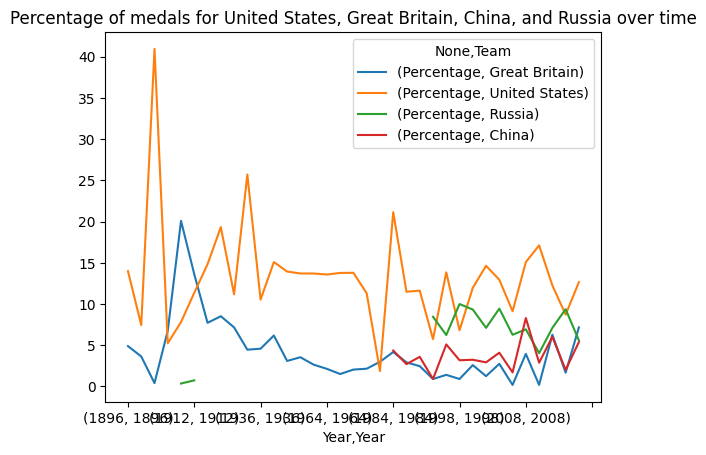

In [44]:
#from Medals table extract only united states, great britain, china, and russia
top4_medals = medals.loc[medals.index.get_level_values('Team').isin(['United States', 'China', 'Russia', 'Great Britain'])]


#plot the relationship between the percentage of gold medals for the United States, Great Britain, China, and Russia over time
top4_medals.unstack().plot(kind='line', title="Percentage of medals for United States, Great Britain, China, and Russia over time")


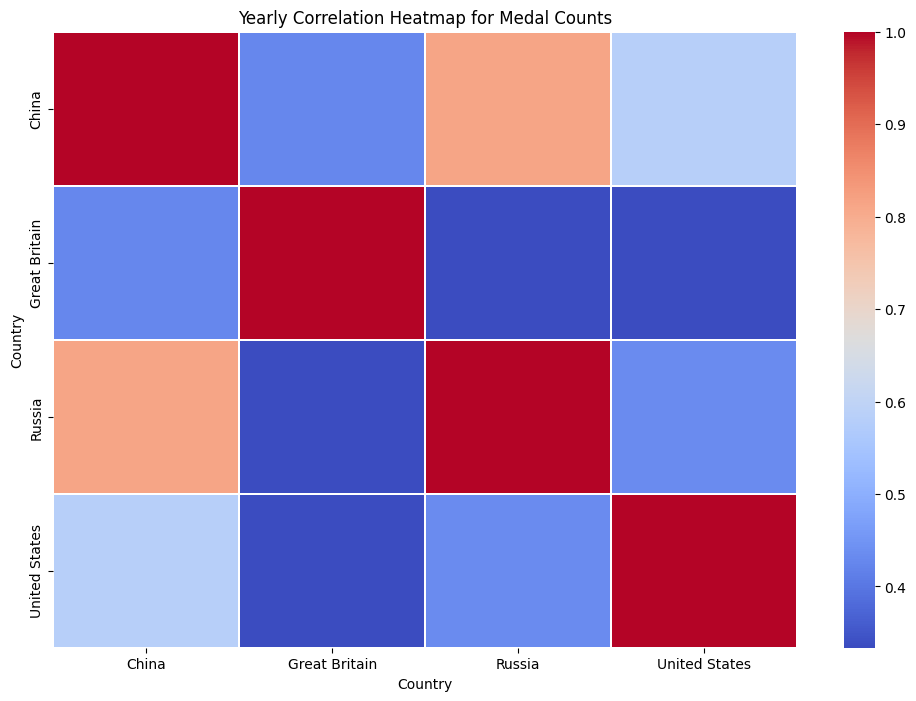

In [46]:
yearly_medal_counts = gold_medals.groupby(['Year', 'Team'])['TotalMedals'].sum().unstack(fill_value=0)

yearly_correlations = yearly_medal_counts.corr()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(yearly_correlations, cmap='coolwarm', linewidths=0.2)
plt.title('Yearly Correlation Heatmap for Medal Counts')
plt.xlabel('Country')
plt.ylabel('Country')
plt.show()



## Question 5 (2 points)

This group focus on implementation using Spark SQL.

### 5.a) Reimplement question 1.e in Spark SQL.


In [37]:
#install pyspark
%pip install pyspark

import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.types import *
from pyspark.sql.functions import *

#pint the vestion of pyspark
print("pyspark version:",pyspark.__version__)


Note: you may need to restart the kernel to use updated packages.
pyspark version: 3.4.1


In [36]:
#install findspark
%pip install findspark

import findspark as fs
fs.init()

#pint the vestion of findspark
print("findspark version:",fs.__version__)

Note: you may need to restart the kernel to use updated packages.
findspark version: 2.0.1


In [80]:
%pip install pyspark[sql]

     --------------------------------------- 24.4/24.4 MB 32.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [81]:
#create a Spark Session 
# .master("local[2]") run Spark on the local machine with 1 core
# .config("spark.sql.execution.arrow.pyspark.enabled", "true") will allow to convert Spark DataFrames into Pandas DataFrames

spark_session = SparkSession.builder \
    .master("local[1]") \
    .appName("Medals") \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .getOrCreate()

In [85]:
medalistsDF = dataDF.groupby(['Name', 'Medal']).size().reset_index(name='counts')
medalistsSDF = spark_session.createDataFrame(medalistsDF)

medalistsSDF.printSchema()

root
 |-- Name: string (nullable = true)
 |-- Medal: string (nullable = true)
 |-- counts: long (nullable = true)



In [87]:

dataSDF = spark_session.createDataFrame(dataDF)

dataSDF.printSchema()

root
 |-- ID: long (nullable = true)
 |-- Name: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- Age: double (nullable = true)
 |-- Height: double (nullable = true)
 |-- Weight: double (nullable = true)
 |-- Team: string (nullable = true)
 |-- NOC: string (nullable = true)
 |-- Games: string (nullable = true)
 |-- Year: long (nullable = true)
 |-- Season: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Sport: string (nullable = true)
 |-- Event: string (nullable = true)
 |-- Medal: string (nullable = true)



In [88]:
dataSDF.collect()
dataSDF.show()

+---+--------------------+---+----+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
| ID|                Name|Sex| Age|Height|Weight|          Team|NOC|      Games|Year|Season|       City|               Sport|               Event|Medal|
+---+--------------------+---+----+------+------+--------------+---+-----------+----+------+-----------+--------------------+--------------------+-----+
|  1|           A Dijiang|  M|24.0| 180.0|  80.0|         China|CHN|1992 Summer|1992|Summer|  Barcelona|          Basketball|Basketball Men's ...| null|
|  2|            A Lamusi|  M|23.0| 170.0|  60.0|         China|CHN|2012 Summer|2012|Summer|     London|                Judo|Judo Men's Extra-...| null|
|  3| Gunnar Nielsen Aaby|  M|24.0|  null|  null|       Denmark|DEN|1920 Summer|1920|Summer|  Antwerpen|            Football|Football Men's Fo...| null|
|  4|Edgar Lindenau Aabye|  M|34.0|  null|  null|Denmark/Sweden|DEN|1900 Summer|19

In [110]:
# Register the DataFrame as a temporary SQL table (which will be reused also in the next exercise)
dataSDF.createOrReplaceTempView("olympics_data")

In [113]:
#SQL query fot question 1.e) --> For each athlete, compute the number of gold, silver and bronze medals she/he has won.
medalists_query = """
SELECT Name, Medal, COUNT(*) AS Medals
FROM olympics_data
WHERE Medal is not null
GROUP BY Name, Medal
ORDER BY Name
"""

# Execute the query
medalists_result = spark.sql(medalists_query)

# Show the top ten medalists
print("Number of gold, silver, and bronze medals for each athlete: ")
medalists_result.show()

Number of gold, silver, and bronze medals for each athlete: 
+--------------------+------+------+
|                Name| Medal|Medals|
+--------------------+------+------+
|           A. Albert|  Gold|     1|
|           A. Dubois|Bronze|     1|
|           A. Dubois|Silver|     1|
|A. Joshua "Josh" ...|Silver|     1|
|            A. Lawry|Silver|     1|
|         A. M. Woods|Silver|     1|
|         A. R. Upton|Silver|     1|
|        A. Willcocks|Silver|     1|
|          Aage Birch|Silver|     1|
|   Aage Ernst Larsen|Silver|     1|
|    Aage Hy Pedersen|Silver|     1|
| Aage Ingvar Eriksen|Silver|     1|
|Aage Jrgen Christ...|  Gold|     1|
|       Aage Jrgensen|Silver|     1|
|  Aage Marius Hansen|Bronze|     1|
|Aage Valdemar Har...|  Gold|     1|
|        Aage Walther|Silver|     1|
|Aagje "Ada" Kok (...|  Gold|     1|
|Aagje "Ada" Kok (...|Silver|     2|
|Aale Maria Tynni ...|  Gold|     1|
+--------------------+------+------+
only showing top 20 rows



### 5.a) Reimplement question 1.d in Spark SQL.


In [114]:
#SQL query fot question 1.d) --> For Summer Olympics, after 1950, who are the athletes that have won more medals in each edition?
medalists_query = """
SELECT Name, Medal, COUNT(*) AS Medals
FROM olympics_data
WHERE Medal is not null
AND Year > 1950
GROUP BY Name, Medal
ORDER BY Medals DESC
LIMIT 10
"""

# Execute the query
medalists_result = spark.sql(medalists_query)

# Show the top ten medalists
print("Top ten summer medalists after 1950:")
medalists_result.show()

Top ten summer medalists after 1950:
+--------------------+-----+------+
|                Name|Medal|Medals|
+--------------------+-----+------+
|Michael Fred Phel...| Gold|    23|
|Frederick Carlton...| Gold|     9|
|Larysa Semenivna ...| Gold|     9|
|   Mark Andrew Spitz| Gold|     9|
| Ole Einar Bjrndalen| Gold|     8|
|Birgit Fischer-Sc...| Gold|     8|
|  Usain St. Leo Bolt| Gold|     8|
|          Sawao Kato| Gold|     8|
|Matthew Nicholas ...| Gold|     8|
|Jennifer Elisabet...| Gold|     8|
+--------------------+-----+------+



I have validated that all values produced by Spark matches the corresponding values obtained in the first part of the assignment.